In [1]:
IP = '10.208.234.8'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
import qcodes.instrument_drivers.rohde_schwarz.ZNB as ZNB
from qcodes.instrument_drivers.rohde_schwarz.ZNB import ZNBChannel
import qcodes

In [4]:
def get_data(param, freq_start = 100e6, freq_stop = 1e9, freq_num = 200, vna_power=-30):
    ZNB.ZNB.close_all()
    vna = ZNB.ZNB('VNA', f'TCPIP0::{IP}::INSTR', init_s_params=False)
    station = qcodes.Station(vna)
    
    vna.add_channel(param)

    vna.cont_meas_on()
    vna.display_single_window()
    vna.rf_on()

    freq_start = freq_start
    freq_stop = freq_stop
    freq_num = freq_num
    freq = np.linspace(freq_start, freq_stop, freq_num)

    vna.channels.format('Complex')

    vna.channels.start(freq_start)
    vna.channels.stop(freq_stop)
    vna.channels.npts(freq_num)

    vna.channels.power(vna_power)
    vna.channels.autoscale()
    
    trace = vna.channels.trace.get()[0]
    
    return {'freq':freq, 'trace':trace}
    

In [8]:
new_data = get_data('S21')

Connected to: Rohde-Schwarz ZNB20-4Port (serial:1311601064101941, firmware:2.88) in 0.12s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qcodes/instrument/base.py:128: QCoDeSDeprecationWarning: Parameter trace_mag_phase on instrument VNA_S21 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qcodes/instrument/base.py:128: QCoDeSDeprecationWarning: Parameter trace on instrument VNA_S21 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qcodes/instrument/base.py:128: QCoDeSDeprecationWarning: Parameter trace_fixed_frequency on instrument VNA_S21 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
/Library/Frameworks/Python.framewor

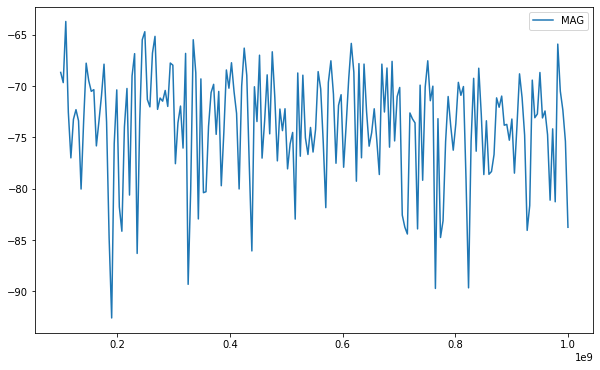

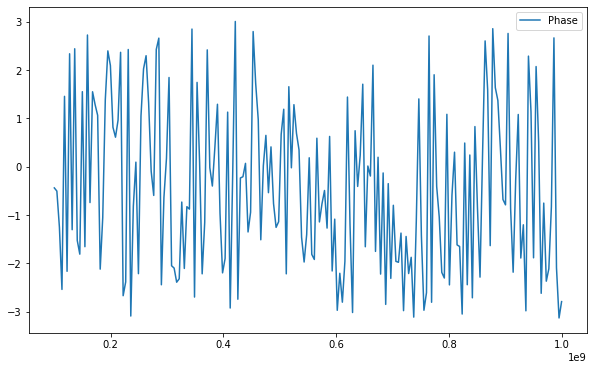

In [9]:
plt.figure(figsize=(10,6))
plt.plot(new_data['freq'], 20 * np.log10(np.abs(new_data['trace'])), label = 'MAG')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(new_data['freq'], np.angle(new_data['trace']), label = 'Phase')
plt.legend()
plt.show()

In [ ]:
with open('data.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['freq-Hz', 're-im'])
    for i in range(len(freq)):
        writer.writerow([freq[i], trace[i]])

In [20]:
import re
exp_path = ''
file_path = ''

''.join(file_path.rsplit(exp_path or None))

''